<a href="https://colab.research.google.com/github/sunnybarnwal/Neural_Network_model_on_seed_dataset-/blob/master/Models_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
seed_dataset=pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/seeds.csv")

In [3]:
#shape
print ("Number of Instances and Attributes",seed_dataset.shape)

Number of Instances and Attributes (210, 8)


In [4]:
#peek dataset
print (seed_dataset.head(20))

       V1     V2      V3     V4     V5     V6     V7  V8
0   15.26  14.84  0.8710  5.763  3.312  2.221  5.220   1
1   14.88  14.57  0.8811  5.554  3.333  1.018  4.956   1
2   14.29  14.09  0.9050  5.291  3.337  2.699  4.825   1
3   13.84  13.94  0.8955  5.324  3.379  2.259  4.805   1
4   16.14  14.99  0.9034  5.658  3.562  1.355  5.175   1
5   14.38  14.21  0.8951  5.386  3.312  2.462  4.956   1
6   14.69  14.49  0.8799  5.563  3.259  3.586  5.219   1
7   14.11  14.10  0.8911  5.420  3.302  2.700  5.000   1
8   16.63  15.46  0.8747  6.053  3.465  2.040  5.877   1
9   16.44  15.25  0.8880  5.884  3.505  1.969  5.533   1
10  15.26  14.85  0.8696  5.714  3.242  4.543  5.314   1
11  14.03  14.16  0.8796  5.438  3.201  1.717  5.001   1
12  13.89  14.02  0.8880  5.439  3.199  3.986  4.738   1
13  13.78  14.06  0.8759  5.479  3.156  3.136  4.872   1
14  13.74  14.05  0.8744  5.482  3.114  2.932  4.825   1
15  14.59  14.28  0.8993  5.351  3.333  4.185  4.781   1
16  13.99  13.83  0.9183  5.119

In [6]:
# descriptions
print(seed_dataset.describe())

               V1          V2          V3          V4          V5          V6  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

               V7          V8  
count  210.000000  210.000000  
mean     5.408071    2.000000  
std      0.491480    0.818448  
min      4.519000    1.000000  
25%      5.045000    1.000000  
50%      5.223000    2.000000  
75%      5.877000    3.000000  
max      6.550

In [7]:
# class distribution
print(seed_dataset.groupby('V1').size())

V1
10.59    1
10.74    1
10.79    1
10.80    1
10.82    1
10.83    1
10.91    1
10.93    1
11.02    1
11.14    1
11.18    2
11.19    1
11.21    1
11.23    3
11.24    1
11.26    1
11.27    2
11.34    1
11.35    1
11.36    1
11.40    1
11.41    1
11.42    1
11.43    1
11.48    1
11.49    1
11.55    1
11.56    1
11.65    1
11.75    1
        ..
18.81    1
18.83    1
18.85    1
18.88    1
18.89    1
18.94    2
18.95    1
18.96    1
18.98    2
19.06    1
19.11    1
19.13    1
19.14    1
19.15    1
19.18    1
19.31    1
19.38    1
19.46    1
19.51    1
19.57    1
19.94    1
20.03    1
20.10    1
20.16    1
20.20    1
20.24    1
20.71    1
20.88    1
20.97    1
21.18    1
Length: 193, dtype: int64


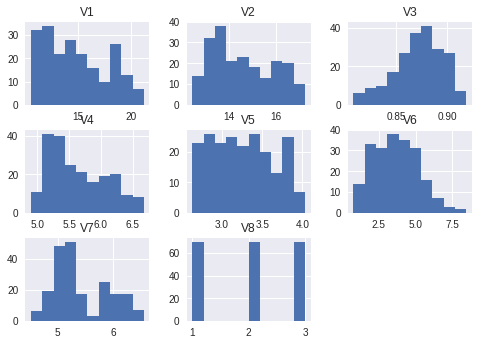

In [8]:
# histograms
seed_dataset.hist()
plt.show()

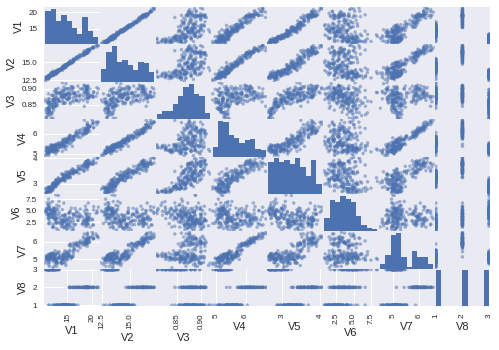

In [9]:
# scatter plot matrix
scatter_matrix(seed_dataset)
plt.show()

In [0]:
# Split-out validation dataset
array = seed_dataset.values

In [0]:
X = array[:,0:4]
Y = array[:,4]

In [12]:
print(X)

[[15.26   14.84    0.871   5.763 ]
 [14.88   14.57    0.8811  5.554 ]
 [14.29   14.09    0.905   5.291 ]
 [13.84   13.94    0.8955  5.324 ]
 [16.14   14.99    0.9034  5.658 ]
 [14.38   14.21    0.8951  5.386 ]
 [14.69   14.49    0.8799  5.563 ]
 [14.11   14.1     0.8911  5.42  ]
 [16.63   15.46    0.8747  6.053 ]
 [16.44   15.25    0.888   5.884 ]
 [15.26   14.85    0.8696  5.714 ]
 [14.03   14.16    0.8796  5.438 ]
 [13.89   14.02    0.888   5.439 ]
 [13.78   14.06    0.8759  5.479 ]
 [13.74   14.05    0.8744  5.482 ]
 [14.59   14.28    0.8993  5.351 ]
 [13.99   13.83    0.9183  5.119 ]
 [15.69   14.75    0.9058  5.527 ]
 [14.7    14.21    0.9153  5.205 ]
 [12.72   13.57    0.8686  5.226 ]
 [14.16   14.4     0.8584  5.658 ]
 [14.11   14.26    0.8722  5.52  ]
 [15.88   14.9     0.8988  5.618 ]
 [12.08   13.23    0.8664  5.099 ]
 [15.01   14.76    0.8657  5.789 ]
 [16.19   15.16    0.8849  5.833 ]
 [13.02   13.76    0.8641  5.395 ]
 [12.74   13.67    0.8564  5.395 ]
 [14.11   14.18    0

In [13]:
print(Y)

[3.312 3.333 3.337 3.379 3.562 3.312 3.259 3.302 3.465 3.505 3.242 3.201
 3.199 3.156 3.114 3.333 3.383 3.514 3.466 3.049 3.129 3.168 3.507 2.936
 3.245 3.421 3.026 2.956 3.221 3.065 2.975 3.371 3.186 3.15  3.328 3.485
 3.464 3.683 3.288 3.298 3.156 3.158 3.201 3.396 3.462 3.155 3.393 3.377
 3.291 3.258 3.272 3.434 3.113 3.199 3.113 3.212 3.377 3.412 3.419 3.032
 2.85  2.879 3.042 3.07  3.026 3.119 3.19  3.158 3.153 2.882 3.561 3.484
 3.594 3.93  3.486 3.438 3.403 3.814 3.639 3.566 3.467 3.857 3.864 3.772
 3.801 3.651 3.764 3.67  4.033 4.032 3.785 3.796 3.693 3.86  3.485 3.463
 3.81  3.552 3.512 3.684 3.525 3.694 3.892 3.681 3.755 3.786 3.806 3.573
 3.763 3.674 3.769 3.791 3.902 3.737 3.991 3.719 3.897 3.815 3.769 3.857
 3.962 3.563 3.387 3.771 3.582 3.869 3.594 3.687 3.773 3.69  3.755 3.825
 3.268 3.395 3.408 3.465 3.574 3.231 3.286 3.472 2.994 3.073 3.074 2.967
 2.777 2.687 2.719 2.967 2.911 2.648 2.84  2.776 2.833 2.693 2.755 2.675
 2.849 2.745 2.678 2.695 2.879 2.81  2.847 2.968 2.

In [0]:
Y=Y.astype('int')

In [0]:
validation_size = 0.20

In [0]:
seed = 7

In [0]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [0]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('CT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [79]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.958456 (0.037853)
CART: 0.922794 (0.058915)
NB: 0.916544 (0.075597)
SVM: 0.910662 (0.060501)


In [22]:
# Make predictions on validation dataset SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.89
[[11  0]
 [ 0 31]]


In [21]:
# Make predictions on validation dataset Logistic Regression
lr=LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.81
[[11  0]
 [ 0 31]]


In [20]:
# Make predictions on validation dataset GaussianNB
gnb=GaussianNB()
gnb.fit(X_train, Y_train)
predictions = gnb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.76
[[11  0]
 [ 2 29]]


In [23]:
# Make predictions on validation dataset GaussianNB
dtc=DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.78
[[10  1  0]
 [ 2 28  1]
 [ 0  0  0]]


After applying various model on seed dataset set we can conclude that SVM is the best model for dseed dataset classification as it is giving highest accuracy  of 0.89 which means that it is 89% accurate. 

Then comes the Logistic Regression which gives the accuracy of 0.81 which is 81% accurate 